In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import itertools
import time
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score


from sklearn.feature_selection import RFE
import statsmodels.formula.api as smf

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
standard_predictors = ['duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes', 'facenumber_in_poster', 'actor_2_facebook_likes', 'aspect_ratio']
predictors_actors = ['director_high', 'actor_1_high',  'actor_2_high', 'actor_3_high']
predictors_genre = ['action', 'biography', 'comedy', 'crime', 'documentary', 'drama', 'history', 'horror', 'music', 'musical', 'mystery', 'romance', 'sport', 'thriller', 'war', 'western']
logistic_model = smf.logit(formula='profit_binary ~ ' + ' + '.join(predictors_actors) + ' + ' + ' + '.join(predictors_genre) + ' + ' + ' + '.join(standard_predictors), data=train).fit()


Optimization terminated successfully.
         Current function value: 0.339561
         Iterations 7


In [7]:
#summary
logistic_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          profit_binary   No. Observations:                 3005
Model:                          Logit   Df Residuals:                     2976
Method:                           MLE   Df Model:                           28
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                  0.5083
Time:                        13:48:44   Log-Likelihood:                -1020.4
converged:                       True   LL-Null:                       -2075.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -2.1816      0.560     -3.894      0.000      -3.280      -1.084
director_high                 1.5380      0.120     12.849      0.000       1.303       1.773
actor_1_high                  0.9081      0.123      7.355      0.000       0.666       1.150
actor_2_high                  1.6683      0.119     14.008      0.000       1.435       1.902
actor_3_high                  2.3943      0.118     20.272      0.000       2.163       2.626
action                       -0.0983      0.162     -0.608      0.543      -0.415       0.219
biography                     0.0945      0.255      0.371      0.711      -0.405       0.594
comedy                       -0.1708      0.156     -1.093      0.274      -0.477       0.135
crime                         0.0825      0.158      0.522      0.602      -0.227       0.392
documentary                   2.3691      0.525      4.510      0.000       1.339       3.399
drama                         0.1489      0.142      1.045      0.296      -0.130       0.428
history                       0.1886      0.317      0.595      0.552      -0.433       0.810
horror                        0.5413      0.225      2.401      0.016       0.099       0.983
music                        -0.0037      0.311     -0.012      0.990      -0.613       0.606
musical                       0.2629      0.416      0.632      0.527      -0.552       1.078
mystery                       0.0918      0.200      0.458      0.647      -0.301       0.485
romance                       0.1083      0.144      0.754      0.451      -0.173       0.390
sport                        -0.2821      0.286     -0.986      0.324      -0.842       0.278
thriller                     -0.0823      0.160     -0.514      0.607      -0.396       0.231
war                           0.2786      0.311      0.895      0.371      -0.331       0.888
western                      -0.2646      0.491     -0.539      0.590      -1.226       0.697
duration                     -0.0072      0.003     -2.239      0.025      -0.014      -0.001
director_facebook_likes    1.797e-07   1.88e-05      0.010      0.992   -3.66e-05    3.69e-05
actor_3_facebook_likes     7.688e-06   8.02e-05      0.096      0.924      -0.000       0.000
actor_1_facebook_likes     2.279e-05    4.7e-05      0.485      0.628   -6.93e-05       0.000
cast_total_facebook_likes -2.688e-05   4.68e-05     -0.574      0.566      -0.000    6.49e-05
facenumber_in_poster         -0.0086      0.028     -0.312      0.755      -0.063       0.046
actor_2_facebook_likes     1.888e-05   4.91e-05      0.385      0.701   -7.74e-05       0.000
aspect_ratio                 -0.2209      0.213     -1.036      0.300      -0.639       0.197
=============================================================================================
"""

## Looking at confusion matrix

0.9285809050452238


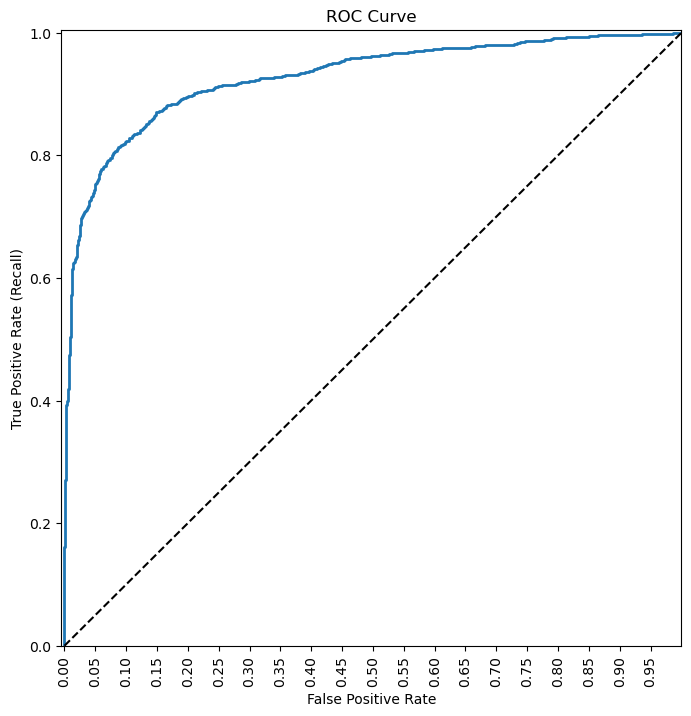

In [8]:
from sklearn.metrics import roc_curve, auc
y=train.profit_binary
ypred = logistic_model.predict(train)
fpr, tpr, auc_thresholds = roc_curve(y, ypred)
print(auc(fpr, tpr))# AUC of ROC
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")

fpr, tpr, auc_thresholds = roc_curve(y, ypred)
plot_roc_curve(fpr, tpr)

In [9]:
#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))

Classification accuracy = 88.4%
Precision = 88.5%
TPR or Recall = 90.4%
FNR = 9.6%
FPR = 13.9%
ROC-AUC = 93.5%


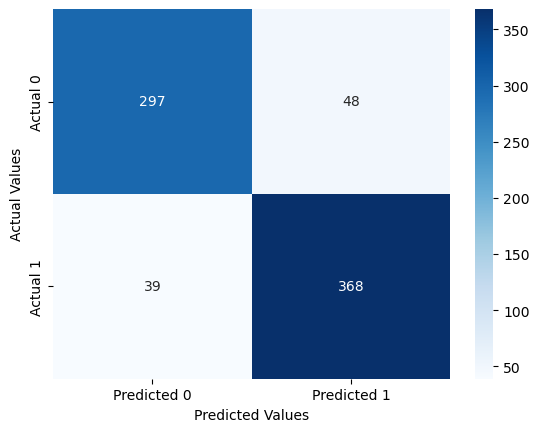

In [10]:
confusion_matrix_data(test,test.profit_binary,logistic_model,0.5)

Precision of 88.3%!

## BACKWARDS 

In [25]:
standard_predictors = ['duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes', 'facenumber_in_poster', 'actor_2_facebook_likes', 'aspect_ratio']
predictors_actors = ['director_high', 'actor_1_high',  'actor_2_high', 'actor_3_high']
predictors_genre = ['action', 'biography', 'comedy', 'crime', 'documentary', 'drama', 'history', 'horror', 'music', 'musical', 'mystery', 'romance', 'sport', 'thriller', 'war', 'western']
predictor_subset = predictors_actors + predictors_genre + standard_predictors
#make X from all predictors
X = train[predictor_subset]

In [21]:
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = smf.ols('profit~' + '+'.join(predictor_subset),data = train).fit()
    Rsquared = model.rsquared
    return {"model":model, "Rsquared":Rsquared}

In [22]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [23]:
def backward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"], index = range(1,len(X.columns)))

    tic = time.time()
    predictors = X.columns
    models_best.loc[len(predictors)] = processSubset(predictors)
    
    while(len(predictors) > 1):  
        models_best.loc[len(predictors)-1] = backward(predictors)
        predictors = models_best.loc[len(predictors)-1]["model"].params.index[1:]

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [24]:
models_best = backward_selection()


PatsyError: Error evaluating factor: NameError: name 'house_price' is not defined
    np.log(house_price)~director_high+actor_1_high+actor_2_high+actor_3_high+action+biography+comedy+crime+documentary+drama+history+horror+music+musical+mystery+romance+sport+thriller+war+western+duration+director_facebook_likes+actor_3_facebook_likes+actor_1_facebook_likes+cast_total_facebook_likes+facenumber_in_poster+actor_2_facebook_likes+aspect_ratio
    ^^^^^^^^^^^^^^^^^^^

## Forward Selection

In [10]:
import statsmodels.api as sm

# Define dependent variable and independent variables
dep_var = 'profit_binary'
indep_vars = ['duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes', 'facenumber_in_poster', 'actor_2_facebook_likes', 'aspect_ratio', 'director_high', 'actor_1_high',  'actor_2_high', 'actor_3_high', 'action', 'biography', 'comedy', 'crime', 'documentary', 'drama', 'history', 'horror', 'music', 'musical', 'mystery', 'romance', 'sport', 'thriller', 'war', 'western']

# Perform forward selection
selected_vars = []
for i in range(len(indep_vars)):
    best_score = -float('inf')
    for var in indep_vars:
        if var not in selected_vars:
            model = sm.Logit(train[dep_var], sm.add_constant(train[selected_vars + [var]])).fit()
            score = model.llf
            if score > best_score:
                best_score = score
                best_var = var
    selected_vars.append(best_var)

# Fit final model using selected variables
final_model = sm.Logit(train[dep_var], sm.add_constant(train[selected_vars])).fit()

# Evaluate final model on test set
test_pred = final_model.predict(sm.add_constant(test[selected_vars]))
test_pred_class = [1 if x > 0.5 else 0 for x in test_pred]
accuracy = sum(test_pred_class == test[dep_var]) / len(test)
print('Accuracy:', accuracy)


Optimization terminated successfully.
         Current function value: 0.690136
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.688834
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.688750
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.690085
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.689331
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.690297
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.688763
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.686245
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.548620
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591583
  

In [11]:
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.Logit(train[dep_var], sm.add_constant(train[selected_vars + [var]])).fit()
    Rsquared = model.llf
    return {"model":model, "Rsquared":Rsquared}

In [12]:
#Function to select the best model amongst all models with 'k' predictors
def getBest_model(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

Processing took way too long, trying backwards selection

## Backward Selection

In [13]:
# Define the response variable and the predictor variables
response_var = "profit_binary"
predictor_vars = ['duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes', 'facenumber_in_poster', 'actor_2_facebook_likes', 'aspect_ratio', 'director_high', 'actor_1_high',  'actor_2_high', 'actor_3_high', 'action', 'biography', 'comedy', 'crime', 'documentary', 'drama', 'history', 'horror', 'music', 'musical', 'mystery', 'romance', 'sport', 'thriller', 'war', 'western']

# Fit the logistic regression model using all the predictors
X = train[predictor_vars]
X = sm.add_constant(X) # add intercept term
y = train[response_var]
logit_model = sm.Logit(y, X).fit()

# Perform backward selection
while len(predictor_vars) > 1:
    # Fit the model with all predictors except one
    max_pval = 0
    max_var = ""
    for var in predictor_vars:
        temp_vars = [x for x in predictor_vars]
        temp_X = train[temp_vars]
        temp_X = sm.add_constant(temp_X) # add intercept term
        temp_logit_model = sm.Logit(y, temp_X).fit(disp=0)
        if temp_logit_model.pvalues[var] > max_pval:
            max_pval = temp_logit_model.pvalues[var]
            max_var = var
    
    # If the maximum p-value is above a threshold (e.g., 0.05), remove the variable with the highest p-value
    if max_pval > 0.05:
        predictor_vars.remove(max_var)
        X = train[predictor_vars]
        X = sm.add_constant(X) # add intercept term
        logit_model = sm.Logit(y, X).fit()
    else:
        break

# Print the final model summary
print(logit_model.summary())

# Evaluate final model on test set
test_pred = logit_model.predict(sm.add_constant(test[predictor_vars]))
test_pred_class = [1 if x > 0.5 else 0 for x in test_pred]
accuracy = sum(test_pred_class == test[dep_var]) / len(test)
print('Accuracy:', accuracy)

Optimization terminated successfully.
         Current function value: 0.339020
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339021
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339033
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339049
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339066
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339088
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339112
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339136
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339166
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339202
  

In [14]:
print(temp_logit_model.pvalues.keys())


Index(['const', 'cast_total_facebook_likes', 'aspect_ratio', 'director_high',
       'actor_1_high', 'actor_2_high', 'actor_3_high', 'comedy', 'documentary',
       'horror'],
      dtype='object')


In [15]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [16]:
def backward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"], index = range(1,len(X.columns)))

    tic = time.time()
    predictors = X.columns
    models_best.loc[len(predictors)] = processSubset(predictors)
    
    while(len(predictors) > 1):  
        models_best.loc[len(predictors)-1] = backward(predictors)
        predictors = models_best.loc[len(predictors)-1]["model"].params.index[1:]

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [17]:
models_best = backward_selection()

Optimization terminated successfully.
         Current function value: 0.339020
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339020
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339020
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339020
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339020
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339020
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339020
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339020
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339020
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339020
  

KeyboardInterrupt: 

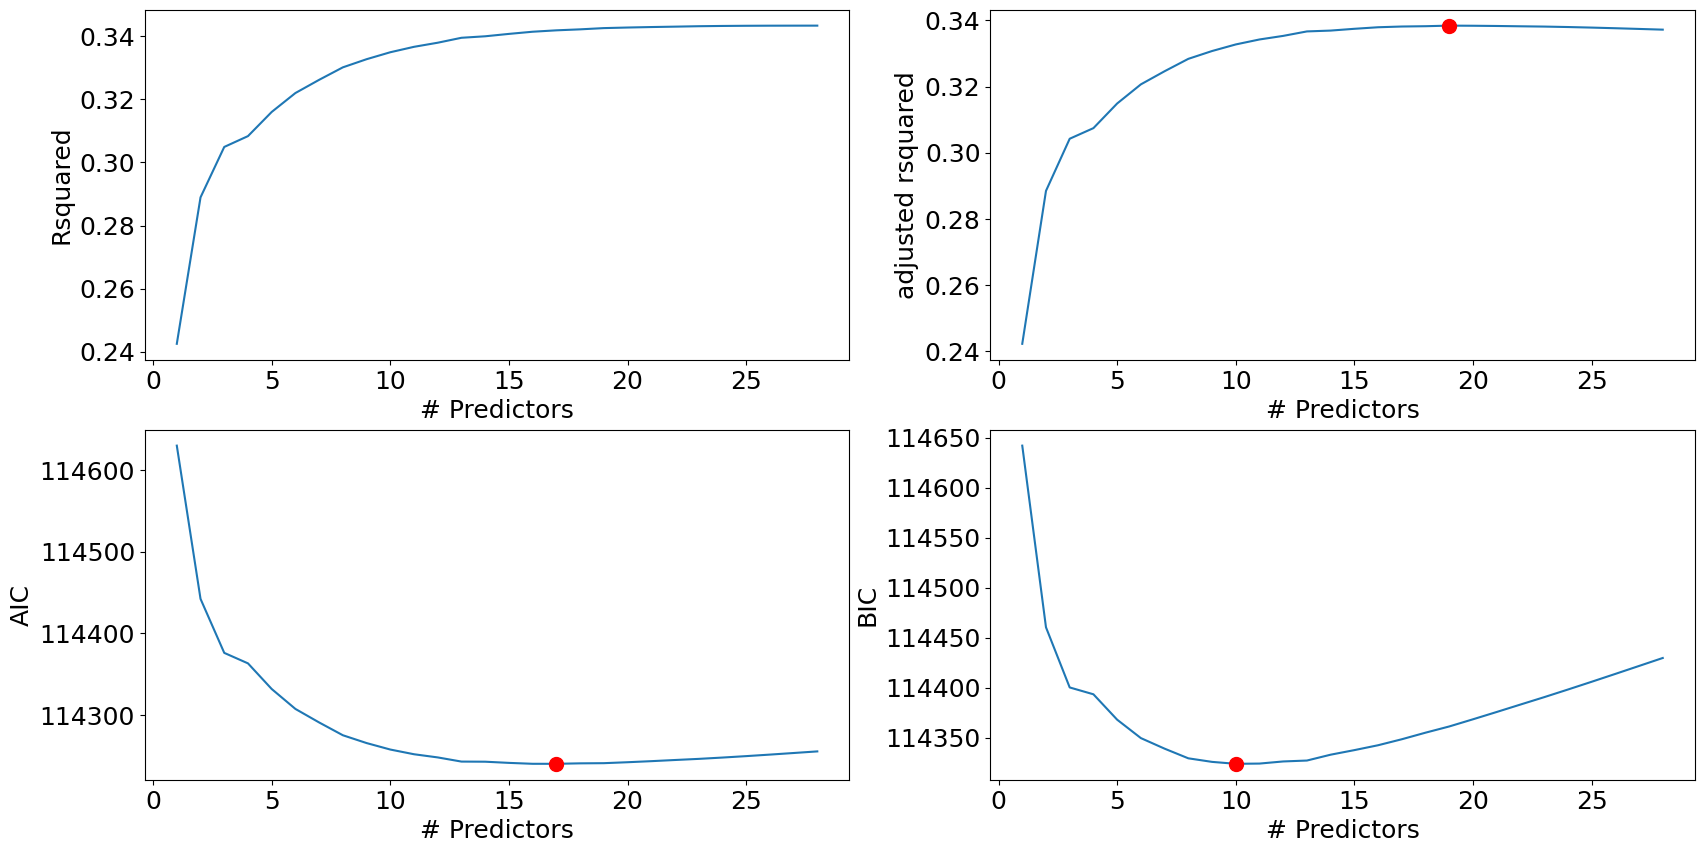

In [ ]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Rsquared')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
best_sub_plots()

Based on BIC, 10 predictors are optimal. Based on AIC, 17 predictors are optimal.

In [ ]:
best_bwd_reg_model = models_best['model'][10]
best_bwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     150.4
Date:                Wed, 08 Mar 2023   Prob (F-statistic):          7.18e-256
Time:                        23:36:25   Log-Likelihood:                -57118.
No. Observations:                2998   AIC:                         1.143e+05
Df Residuals:                    2987   BIC:                         1.143e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                 -1.414e+07    6.8e+06     -2.081      0.038   -2.75e+07   -8.18e+05
director_facebook_likes    1237.8907    282.219      4.386      0.000     684.528    1791.254
actor_3_facebook_likes    -4398.0854   1272.837     -3.455      0.001   -6893.811   -1902.359
actor_1_facebook_likes    -4443.3834    761.285     -5.837      0.000   -5936.080   -2950.687
cast_total_facebook_likes  4399.2304    759.807      5.790      0.000    2909.433    5889.028
actor_2_facebook_likes    -4204.1202    800.409     -5.252      0.000   -5773.529   -2634.711
aspect_ratio              -9.792e+06   3.11e+06     -3.150      0.002   -1.59e+07    -3.7e+06
director_high              1.385e+07   1.97e+06      7.026      0.000    9.99e+06    1.77e+07
actor_1_high               1.014e+07   2.01e+06      5.047      0.000     6.2e+06    1.41e+07
actor_2_high               2.079e+07    2.1e+06      9.921      0.000    1.67e+07    2.49e+07
actor_3_high               3.129e+07   2.13e+06     14.688      0.000    2.71e+07    3.55e+07
==============================================================================
Omnibus:                     1410.540   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65075.677
Skew:                           1.498   Prob(JB):                         0.00
Kurtosis:                      25.627   Cond. No.                     2.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Classification accuracy = nan%
Precision = nan%
TPR or Recall = nan%
FNR = nan%
FPR = nan%
ROC-AUC = 92.4%


C:\Users\Yasmeen\AppData\Local\Temp\ipykernel_23024\2813583335.py:13: RuntimeWarning: invalid value encountered in double_scalars
  accuracy = (cm[0,0]+cm[1,1])/cm.sum()
C:\Users\Yasmeen\AppData\Local\Temp\ipykernel_23024\2813583335.py:14: RuntimeWarning: invalid value encountered in double_scalars
  fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
C:\Users\Yasmeen\AppData\Local\Temp\ipykernel_23024\2813583335.py:15: RuntimeWarning: invalid value encountered in double_scalars
  precision = (cm[1,1])/(cm[0,1]+cm[1,1])
C:\Users\Yasmeen\AppData\Local\Temp\ipykernel_23024\2813583335.py:16: RuntimeWarning: invalid value encountered in double_scalars
  fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
C:\Users\Yasmeen\AppData\Local\Temp\ipykernel_23024\2813583335.py:17: RuntimeWarning: invalid value encountered in double_scalars
  tpr = (cm[1,1])/(cm[1,0]+cm[1,1])


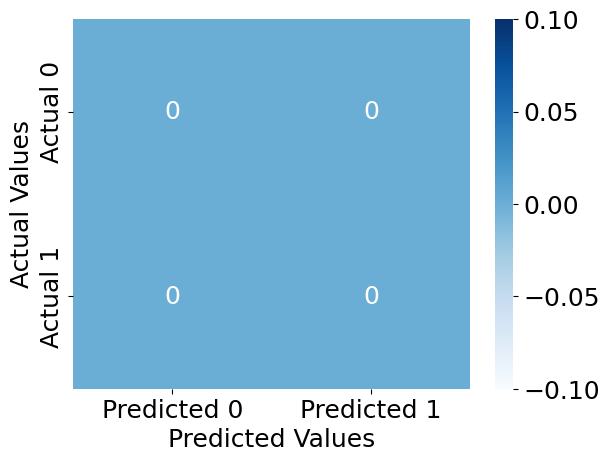

In [ ]:
confusion_matrix_data(test,test.profit_binary,best_bwd_reg_model,0.5)

In [ ]:
best_bwd_reg_model = models_best['model'][17]
best_bwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     91.07
Date:                Wed, 08 Mar 2023   Prob (F-statistic):          2.69e-255
Time:                        23:36:17   Log-Likelihood:                -57102.
No. Observations:                2998   AIC:                         1.142e+05
Df Residuals:                    2980   BIC:                         1.143e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                 -2.304e+07   7.51e+06     -3.068      0.002   -3.78e+07   -8.32e+06
duration                   1.258e+05   4.21e+04      2.991      0.003    4.33e+04    2.08e+05
director_facebook_likes    1077.4944    284.778      3.784      0.000     519.113    1635.876
actor_3_facebook_likes    -4128.4572   1271.155     -3.248      0.001   -6620.887   -1636.028
actor_1_facebook_likes    -4291.1997    761.511     -5.635      0.000   -5784.339   -2798.060
cast_total_facebook_likes  4250.5121    760.096      5.592      0.000    2760.147    5740.878
facenumber_in_poster      -1.332e+06   4.07e+05     -3.271      0.001   -2.13e+06   -5.33e+05
actor_2_facebook_likes    -4063.6785    800.382     -5.077      0.000   -5633.036   -2494.321
aspect_ratio              -8.933e+06   3.27e+06     -2.735      0.006   -1.53e+07   -2.53e+06
director_high              1.356e+07   1.97e+06      6.886      0.000     9.7e+06    1.74e+07
actor_1_high               9.895e+06      2e+06      4.939      0.000    5.97e+06    1.38e+07
actor_2_high               2.037e+07   2.09e+06      9.726      0.000    1.63e+07    2.45e+07
actor_3_high               3.092e+07   2.13e+06     14.546      0.000    2.67e+07    3.51e+07
action                    -4.364e+06   2.11e+06     -2.068      0.039    -8.5e+06   -2.26e+05
drama                     -4.074e+06   1.89e+06     -2.151      0.032   -7.79e+06    -3.6e+05
history                   -1.276e+07   4.37e+06     -2.918      0.004   -2.13e+07   -4.18e+06
horror                     -4.87e+06   2.89e+06     -1.687      0.092   -1.05e+07    7.91e+05
musical                    7.088e+06   5.01e+06      1.416      0.157   -2.73e+06    1.69e+07
==============================================================================
Omnibus:                     1382.251   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61157.799
Skew:                           1.463   Prob(JB):                         0.00
Kurtosis:                      24.932   Cond. No.                     2.82e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Classification accuracy = nan%
Precision = nan%
TPR or Recall = nan%
FNR = nan%
FPR = nan%
ROC-AUC = 92.4%


C:\Users\Yasmeen\AppData\Local\Temp\ipykernel_23024\2813583335.py:13: RuntimeWarning: invalid value encountered in double_scalars
  accuracy = (cm[0,0]+cm[1,1])/cm.sum()
C:\Users\Yasmeen\AppData\Local\Temp\ipykernel_23024\2813583335.py:14: RuntimeWarning: invalid value encountered in double_scalars
  fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
C:\Users\Yasmeen\AppData\Local\Temp\ipykernel_23024\2813583335.py:15: RuntimeWarning: invalid value encountered in double_scalars
  precision = (cm[1,1])/(cm[0,1]+cm[1,1])
C:\Users\Yasmeen\AppData\Local\Temp\ipykernel_23024\2813583335.py:16: RuntimeWarning: invalid value encountered in double_scalars
  fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
C:\Users\Yasmeen\AppData\Local\Temp\ipykernel_23024\2813583335.py:17: RuntimeWarning: invalid value encountered in double_scalars
  tpr = (cm[1,1])/(cm[1,0]+cm[1,1])


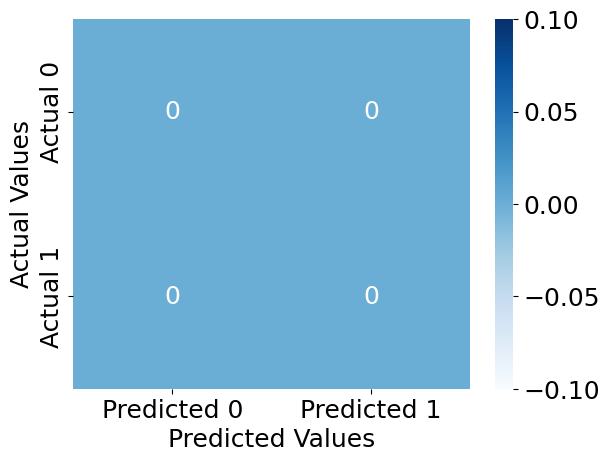

In [ ]:
confusion_matrix_data(test,test.profit_binary,best_bwd_reg_model,0.5)

There seems to be a problem with the model. It might be that the models are linear regression instead of logit in both these instances, rendering the models problematic.

## Ridge

In [ ]:
test_dropped = test[['duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes', 'facenumber_in_poster', 'actor_2_facebook_likes', 'aspect_ratio','director_high', 'actor_1_high',  'actor_2_high', 'actor_3_high','action', 'biography', 'comedy', 'crime', 'documentary', 'drama', 'history', 'horror', 'music', 'musical', 'mystery', 'romance', 'sport', 'thriller', 'war', 'western']]
train_dropped = train[['duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes', 'facenumber_in_poster', 'actor_2_facebook_likes', 'aspect_ratio','director_high', 'actor_1_high',  'actor_2_high', 'actor_3_high','action', 'biography', 'comedy', 'crime', 'documentary', 'drama', 'history', 'horror', 'music', 'musical', 'mystery', 'romance', 'sport', 'thriller', 'war', 'western']]

In [ ]:
y = (train.profit_binary)

scaler = StandardScaler()
scaler.fit(train_dropped)

train_dropped_std = scaler.transform(train_dropped)
test_dropped_std = scaler.transform(test_dropped)

alphas = 10**np.linspace(2,0.5,200)*0.5

ridgecv = RidgeCV(alphas = alphas,store_cv_values=True)
ridgecv.fit(train_dropped_std, y)

#Returns ther Optimal value of the tuning parameter - lambda
ridgecv.alpha_

50.0

The optimum value for the tuning parameter is 50.

In [ ]:
ridge = Ridge(alpha = ridgecv.alpha_).fit(train_dropped_std, y)
ridge

Ridge(alpha=50.0)

In [ ]:
# RMSE of test1
pred_profit_binary = ridge.predict(test_dropped_std)
np.sqrt(((test.profit_binary - pred_profit_binary)**2).mean())

0.3256832676524784

Very small RMSE! Better model.

In [ ]:
ridge_ols_est = Ridge(alpha = 10**-10).fit(train_dropped_std, y)
ridge_ols_est

Ridge(alpha=1e-10)

In [ ]:
ridge_ols_est.coef_

array([-1.01964720e-02, -9.81350913e-04,  1.86554731e-03,  3.95295707e-02,
       -5.81360412e-02,  7.09817319e-05,  1.03738128e-02, -1.94366247e-02,
        1.05987504e-01,  4.89020394e-02,  1.18126929e-01,  2.09141912e-01,
       -7.21974649e-03, -1.42858826e-03, -1.76859055e-02,  1.12971264e-03,
        9.74259823e-03,  5.29106242e-03,  4.81200586e-03,  1.36117420e-02,
        4.77031936e-04,  1.18844317e-03,  4.74849297e-03,  5.70242703e-03,
       -3.46375710e-03, -5.81108234e-03,  2.83569696e-03, -3.87691906e-03])

In [ ]:
ridge.coef_

array([-9.69549438e-03, -8.28593899e-04, -5.03913419e-03, -4.59758877e-04,
       -9.34919781e-03, -1.78566828e-05, -1.14308466e-03, -1.93123038e-02,
        1.05462857e-01,  4.96513236e-02,  1.17458637e-01,  2.05565707e-01,
       -7.49098576e-03, -1.35367092e-03, -1.70740849e-02,  8.07359877e-04,
        9.73076417e-03,  5.03538068e-03,  4.55688595e-03,  1.35384461e-02,
        5.93676406e-04,  1.18399070e-03,  4.64579735e-03,  5.64280887e-03,
       -3.38057395e-03, -5.49410333e-03,  2.57857186e-03, -3.90384818e-03])

In [ ]:
coeff_diff = pd.Series(np.abs(ridge_ols_est.coef_ - ridge.coef_))
coeff_diff

0     0.000501
1     0.000153
2     0.006905
3     0.039989
4     0.048787
5     0.000089
6     0.011517
7     0.000124
8     0.000525
9     0.000749
10    0.000668
11    0.003576
12    0.000271
13    0.000075
14    0.000612
15    0.000322
16    0.000012
17    0.000256
18    0.000255
19    0.000073
20    0.000117
21    0.000004
22    0.000103
23    0.000060
24    0.000083
25    0.000317
26    0.000257
27    0.000027
dtype: float64

## Lasso

In [ ]:
alphas = 10**np.linspace(0,-2.5,200)*0.5

lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000)
lassocv.fit(train_dropped_std, y)
# Optimal value of the tuning parameter - lamda
lassocv.alpha_

0.007116006498083504

In [ ]:
#Using the developed lasso model to predict on test data
lasso = Lasso(alpha = lassocv.alpha_).fit(train_dropped_std, y)
lasso

Lasso(alpha=0.007116006498083504)

In [ ]:
#RMSE test 
pred_lasso = lasso.predict(test_dropped_std)
np.sqrt(((test.profit_binary - pred_lasso)**2).mean())

0.325032182450617

RMSE of 0.325032182450617

## Looking at potential interaction terms

In [ ]:
logistic_model = smf.logit(formula='profit_binary ~ ' + ' + '.join(predictors_actors) + ' + ' + ' + '.join(predictors_genre) + ' + ' + ' + '.join(standard_predictors)  + '+actor_1_facebook_likes*cast_total_facebook_likes+cast_total_facebook_likes*actor_2_facebook_likes', data=train).fit()
logistic_model.summary()

Optimization terminated successfully.
         Current function value: 0.335797
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          profit_binary   No. Observations:                 2998
Model:                          Logit   Df Residuals:                     2967
Method:                           MLE   Df Model:                           30
Date:                Wed, 08 Mar 2023   Pseudo R-squ.:                  0.5136
Time:                        23:00:12   Log-Likelihood:                -1006.7
converged:                       True   LL-Null:                       -2069.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           -1.3591      0.588     -2.310      0.021      -2.512      -0.206
director_high                                        1.5988      0.121     13.214      0.000       1.362       1.836
actor_1_high                                         0.9324      0.129      7.215      0.000       0.679       1.186
actor_2_high                                         1.6290      0.121     13.419      0.000       1.391       1.867
actor_3_high                                         2.4310      0.119     20.364      0.000       2.197       2.665
action                                              -0.1629      0.161     -1.011      0.312      -0.479       0.153
biography                                           -0.0891      0.262     -0.340      0.734      -0.602       0.424
comedy                                              -0.3966      0.157     -2.520      0.012      -0.705      -0.088
crime                                                0.0716      0.158      0.452      0.651      -0.239       0.382
documentary                                          1.3621      0.629      2.166      0.030       0.129       2.595
drama                                                0.1090      0.143      0.764      0.445      -0.171       0.389
history                                              0.1479      0.321      0.461      0.645      -0.481       0.777
horror                                               0.4922      0.225      2.189      0.029       0.052       0.933
music                                                0.0607      0.319      0.191      0.849      -0.564       0.685
musical                                              0.0587      0.406      0.145      0.885      -0.736       0.854
mystery                                              0.1432      0.203      0.706      0.480      -0.254       0.540
romance                                              0.1502      0.145      1.036      0.300      -0.134       0.434
sport                                               -0.1466      0.295     -0.496      0.620      -0.726       0.433
thriller                                            -0.0638      0.161     -0.396      0.692      -0.380       0.252
war                                                  0.1903      0.312      0.609      0.542      -0.422       0.803
western                                             -0.1829      0.528     -0.347      0.729      -1.217       0.851
duration                                            -0.0045      0.003     -1.385      0.166      -0.011       0.002
director_facebook_likes                          -4.935e-07   1.89e-05     -0.026      0.979   -3.75e-05    3.65e-05
actor_3_facebook_likes                           -1.705e-05   8.28e-05     -0.206      0.837      -0.000       0.000
actor_1_facebook_likes                           -1.125e-05   5.11e-05     -0.220 

Classification accuracy = 85.9%
Precision = 88.6%
TPR or Recall = 84.7%
FNR = 15.3%
FPR = 12.7%
ROC-AUC = 93.3%


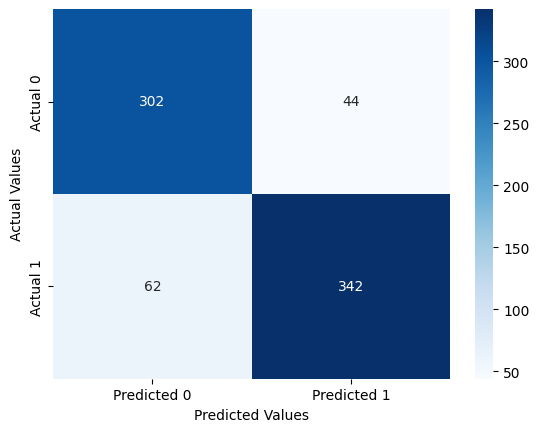

In [ ]:
confusion_matrix_data(test,test.profit_binary,logistic_model,0.5)

The model precision improved to 88.6% from 88.3% when the interaction between actor_1_facebook_likes:cast_total_facebook_likes and cast_total_facebook_likes:actor_2_facebook_likes was taken into account.